In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# from colormaps import parula
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import colors, cm
from scipy.stats import linregress
from scipy.stats import gaussian_kde
from statistics import mean

In [2]:
landsat_band = pd.read_csv(r"E:\ESSD_crc_rf\融合反射率对比\last\LNP_XLH_SNP_2020Q.csv")
landsat_band.head()

,l1,r1,l2,r2,l3,r3,l4,r4,l5,r5,l6,r6
0,0.044993,0.041772,0.056687,0.072333,0.049858,0.056277,0.057867,0.083398,0.034431,0.038492,0.025507,0.027020
1,0.021875,0.021875,0.042583,0.042583,0.047482,0.047482,0.041838,0.041838,0.035231,0.035231,0.026445,0.026445
2,0.026077,0.026077,0.036057,0.036057,0.046764,0.046764,0.040163,0.040163,0.025255,0.025255,0.027482,0.027482
3,0.026158,0.058100,0.043825,0.107155,0.054780,0.090523,0.044559,0.101591,0.041247,0.127848,0.030902,0.157342
4,0.124610,0.123730,0.126883,0.029518,0.113531,0.113511,0.118292,0.118187,0.056729,0.056946,0.036246,0.038615


散点密度图

In [3]:
import matplotlib as mpl
mpl.rcParams.update(
    {
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
    "font.weight":"bold",
    }
    )
ref_gdf=pd.read_csv(r"E:\ESSD_crc_rf\融合反射率对比\last\LNP_XLH_SNP_2020Q.csv")
ref_gdf.head()

,l1,r1,l2,r2,l3,r3,l4,r4,l5,r5,l6,r6
0,0.044993,0.041772,0.056687,0.072333,0.049858,0.056277,0.057867,0.083398,0.034431,0.038492,0.025507,0.027020
1,0.021875,0.021875,0.042583,0.042583,0.047482,0.047482,0.041838,0.041838,0.035231,0.035231,0.026445,0.026445
2,0.026077,0.026077,0.036057,0.036057,0.046764,0.046764,0.040163,0.040163,0.025255,0.025255,0.027482,0.027482
3,0.026158,0.058100,0.043825,0.107155,0.054780,0.090523,0.044559,0.101591,0.041247,0.127848,0.030902,0.157342
4,0.124610,0.123730,0.126883,0.029518,0.113531,0.113511,0.118292,0.118187,0.056729,0.056946,0.036246,0.038615


In [4]:
def get_xyz(band):
    real = ref_gdf.loc[:, f'l{band}']
    pred = ref_gdf.loc[:, f'r{band}']
    # mask1 = ~np.isnan(real)
    # mask2 = ~np.isnan(pred)
    # mask = mask1 & mask2
    # real = real[mask]
    # pred = pred[mask]
    # 计算点密度
    xy = np.vstack([real, pred])  #  将两个维度的数据叠加
    z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度
    idx = z.argsort()
    real, pred, z = real.iloc[idx], pred.iloc[idx], z[idx] 
    return real, pred, z

In [5]:
def get_regression_line(real, pred, data_range=(0, 1)):
    # 拟合（若换MK，自行操作）最小二乘
    def slope(xs, ys):
        m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
        b = mean(ys) - m * mean(xs)
        return m, b
    k, b = slope(real, pred)
    regression_line = []
    for a in range(data_range[0], data_range[1]+1):
        regression_line.append((k * a) + b)
    return regression_line

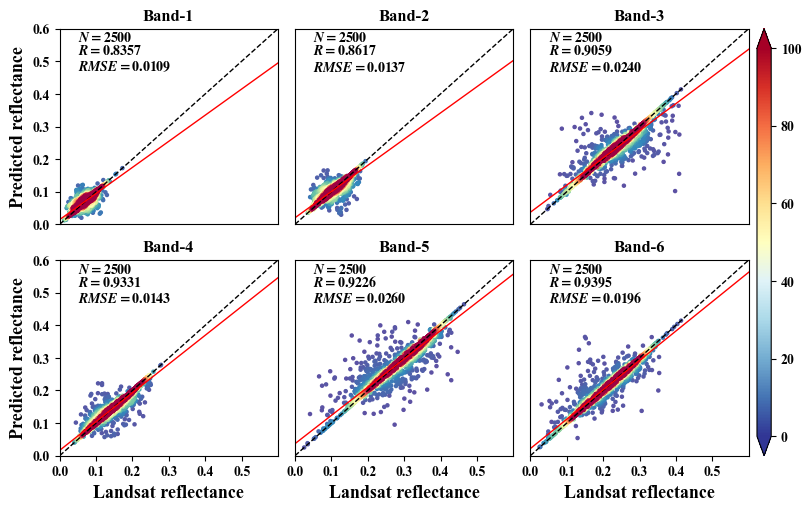

In [6]:
# 绘图，可自行调整颜色等等
fig, axs = plt.subplots(2, 3, constrained_layout=True, figsize=(8, 5))
years = [1, 2, 3, 4, 5, 6]
i = 1
vmin, vmax = 0, 100
for year, ax in zip(years, axs.flatten()):
    real, pred, z = get_xyz(year)
    # vmin=np.min(z)
    # print(vmin)
    # vmax=np.max(z)
    # print(vmax)
    scatter = ax.scatter(real, pred, marker='o', c=z, edgecolors=None, s=5, cmap='Spectral_r', vmin=vmin, vmax=vmax)
    ax.plot([0, 0.6], [0, 0.6], 'k--', lw=1)  # 画的1:1线，线的颜色为black，线宽为0.8
    regression_line = get_regression_line(real, pred, data_range=(0, 1))
    ax.plot(regression_line, 'r-', lw=1.)      # 预测与实测数据之间的回归线
    fontdict1 = {"size":13,"color":"k",'family':'Times New Roman','weight': 'bold',}
    if i>3:
        # 科学计数法的斜体和字体设置
        ax.set_xlabel('Landsat reflectance',fontdict=fontdict1)
    if i==1 or i==4:
        ax.set_ylabel('Predicted reflectance',fontdict=fontdict1)
    if i<4:
        ax.axes.xaxis.set_visible(False)
    if i in [2, 3, 5, 6]:
        ax.axes.yaxis.set_visible(False)
        # 秋季0.55，春季0.6
    ax.set_xlim(0, 0.6) # 设置x坐标轴的显示范围
    ax.set_xticks(np.arange(0, 0.6, step=0.1))
    ax.set_ylim(0, 0.6) # 设置y坐标轴的显示范围
    x, y = real, pred
    BIAS = mean(x - y)
    MSE = mean_squared_error(x, y)
    RMSE = np.power(MSE, 0.5)
    R = np.corrcoef(x, y)[0, 1]
    fontdict = {'weight': 'normal','size':10,'color':'k','family':'Times New Roman'}
    # 秋季0.52，春季0.57
    ax.text(0.05, 0.56, '$N=%.f$' % len(y), fontdict=fontdict) # text的位置需要根据x,y的大小范围进行调整。
    # 秋季0.47，春季0.52
    ax.text(0.05, 0.52, '$R=%.4f$' % R, fontdict=fontdict)
    # ax.text(0.05, 0.42, '$BIAS=%.2f$' % BIAS, family = 'Times New Roman')
    # 秋季0.42，春季0.47
    ax.text(0.05, 0.47, '$RMSE=%.4f$' % RMSE, fontdict=fontdict)
    font = {'family' : 'Times New Roman',
        'weight' : 'bold',}
    axs[0, 0].set_title("Band-1",fontdict=font)
    axs[0, 1].set_title("Band-2",fontdict=font)
    axs[0, 2].set_title("Band-3",fontdict=font)
    axs[1, 0].set_title("Band-4",fontdict=font)
    axs[1, 1].set_title("Band-5",fontdict=font)
    axs[1, 2].set_title("Band-6",fontdict=font)
    i += 1
norm = colors.Normalize(vmin,vmax)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="RdYlBu_r"),extend='both',
                    pad=0.012, orientation='vertical', aspect=30, ax=axs)
font = {'family' : 'Times New Roman',
        'weight' : 'bold',}
# cbar.set_label(fontdict=font) #设置colorbar的标签字体及其大小